In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv(r"C:\Users\madhu\Downloads\university_admission.csv")

In [3]:
data.head()

,Serial No.,pre_term_test,final_term_test,university_rating,sop_strength,lor_score,cgpa,has_research_exp,admission_chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   pre_term_test      500 non-null    int64  
 2   final_term_test    500 non-null    int64  
 3   university_rating  500 non-null    int64  
 4   sop_strength       500 non-null    float64
 5   lor_score          500 non-null    float64
 6   cgpa               500 non-null    float64
 7   has_research_exp   500 non-null    int64  
 8   admission_chance   500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


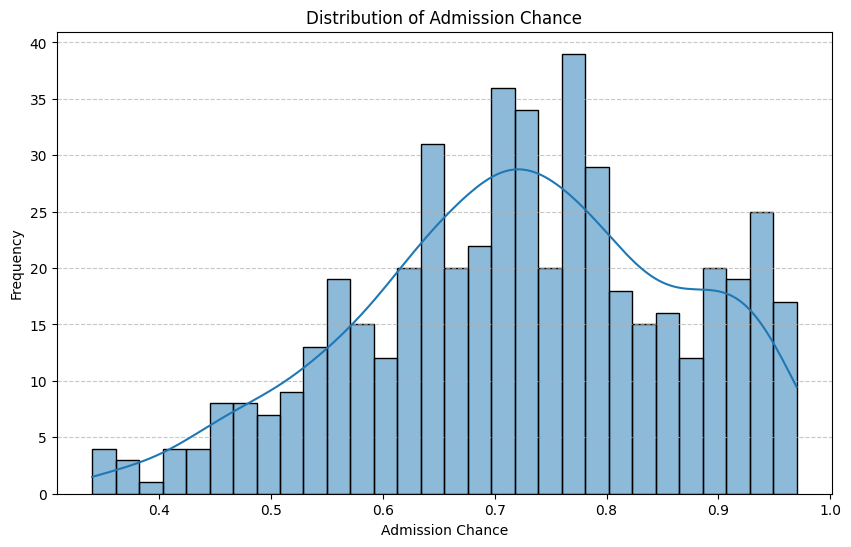

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data['admission_chance'], kde=True, bins=30)
plt.title('Distribution of Admission Chance')
plt.xlabel('Admission Chance')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
data_corr = data.drop('Serial No.', axis=1).corr()

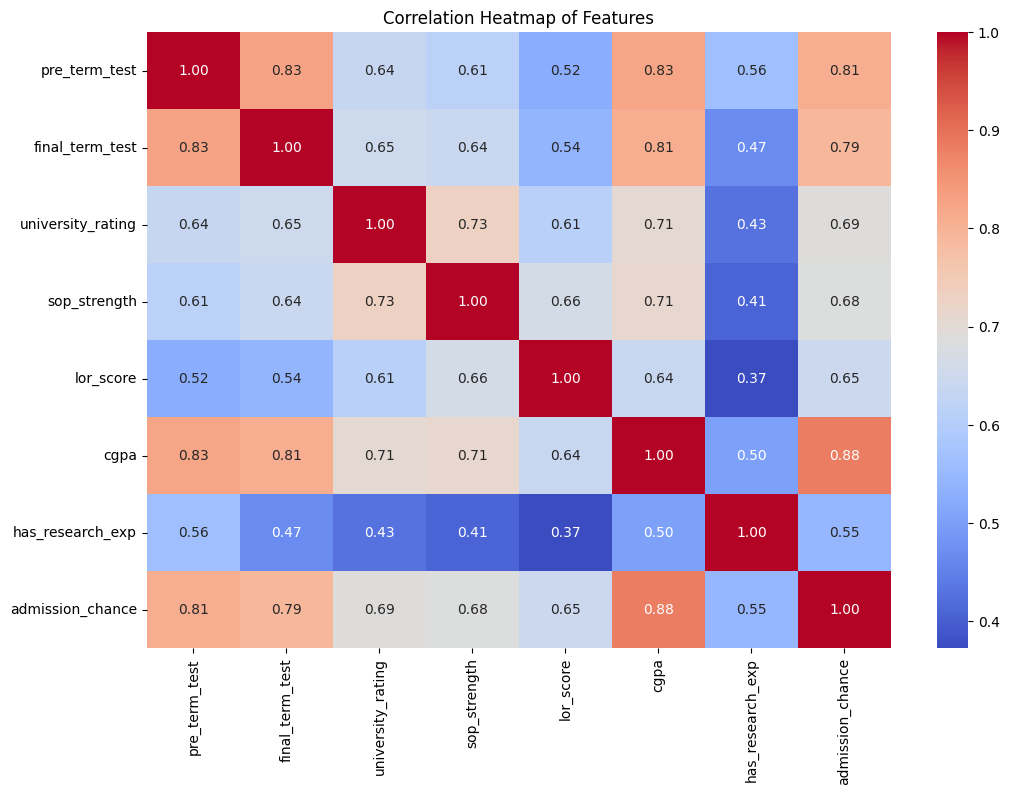

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()

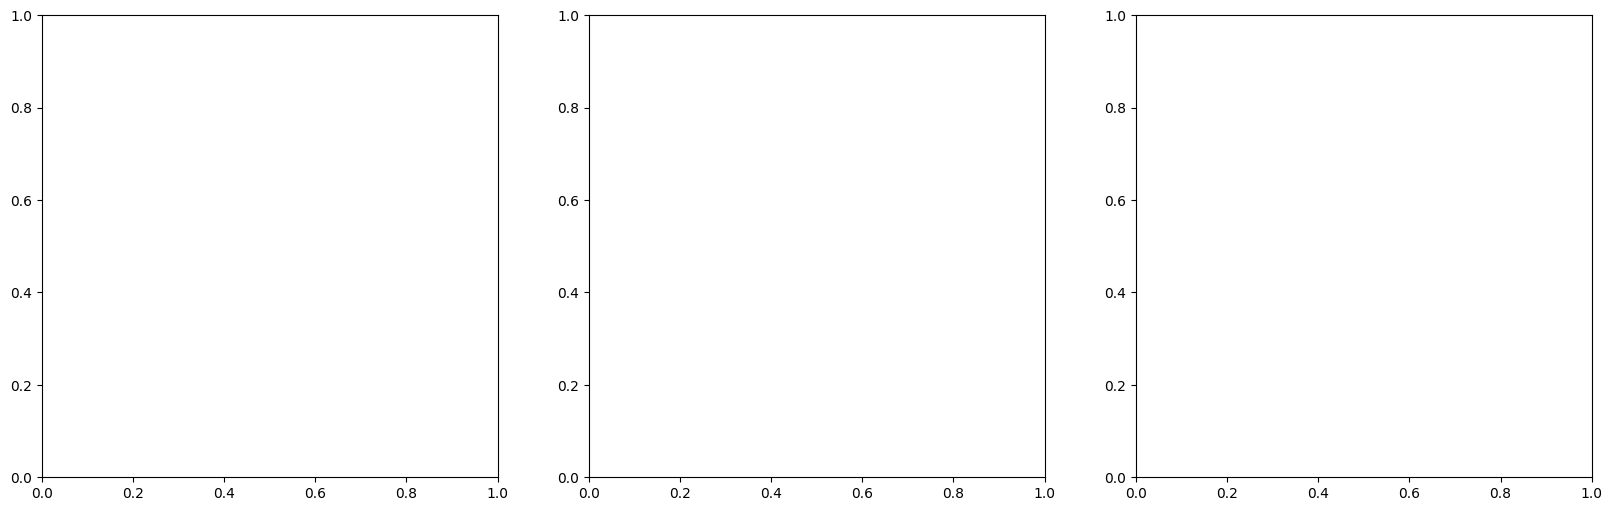

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

In [18]:
sns.scatterplot(ax=axes[0], x='cgpa', y='admission_chance', data=data, hue='has_research_exp')
axes[0].set_title('CGPA vs. Admission Chance')
axes[0].grid(True, linestyle='--', alpha=0.5)
sns.scatterplot(ax=axes[1], x='final_term_test', y='admission_chance', data=data, hue='has_research_exp')
axes[1].set_title('Final Term Test vs. Admission Chance')
axes[1].grid(True, linestyle='--', alpha=0.5)
sns.scatterplot(ax=axes[2], x='pre_term_test', y='admission_chance', data=data, hue='has_research_exp')
axes[2].set_title('Pre-Term Test vs. Admission Chance')
axes[2].grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [19]:
X = data.drop(['Serial No.', 'admission_chance'], axis=1)
y = data['admission_chance']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (400, 7)
Testing set shape: (100, 7)


In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\n--- Scaled Training Data Head ---")
print(X_train_scaled.head())


--- Scaled Training Data Head ---
   pre_term_test  final_term_test  university_rating  sop_strength  lor_score  \
0       0.389986         0.602418          -0.098298      0.126796   0.564984   
1      -0.066405         0.602418           0.775459      0.633979   1.651491   
2      -1.253022        -0.876917          -0.098298      0.126796  -0.521524   
3      -0.248961        -0.055064          -0.972054     -0.887570   0.564984   
4      -0.796631        -0.219435          -0.098298      0.126796  -1.064777   

       cgpa  has_research_exp  
0  0.415018          0.895434  
1 -0.067852         -1.116777  
2 -0.134454         -1.116777  
3 -0.517420         -1.116777  
4 -0.617324          0.895434  


In [24]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

In [25]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)

print("\nAll models trained successfully!")

Training Linear Regression...
Training Random Forest...
Training Gradient Boosting...

All models trained successfully!


In [28]:
!pip install tabulate

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
results = []
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results.append({
        'Model': name,
        'R-squared ($R^2$)': r2,
        'Mean Absolute Error (MAE)': mae,
        'Root Mean Squared Error (RMSE)': rmse
    })
results_df = pd.DataFrame(results).set_index('Model')
print("--- Model Performance Comparison ---")
print(results_df.to_markdown(floatfmt=".4f"))

--- Model Performance Comparison ---
| Model             |   R-squared ($R^2$) |   Mean Absolute Error (MAE) |   Root Mean Squared Error (RMSE) |
|:------------------|--------------------:|----------------------------:|---------------------------------:|
| Linear Regression |              0.8188 |                      0.0427 |                           0.0609 |
| Random Forest     |              0.7887 |                      0.0438 |                           0.0657 |
| Gradient Boosting |              0.7826 |                      0.0462 |                           0.0667 |


In [30]:
coefficients = models['Linear Regression'].coef_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)
print("--- Feature Importance (Linear Regression Coefficients) ---")
print(feature_importance_df.to_markdown(index=False, floatfmt=".4f"))

--- Feature Importance (Linear Regression Coefficients) ---
| Feature           |   Coefficient |
|:------------------|--------------:|
| cgpa              |        0.0676 |
| pre_term_test     |        0.0267 |
| final_term_test   |        0.0182 |
| lor_score         |        0.0159 |
| has_research_exp  |        0.0119 |
| university_rating |        0.0029 |
| sop_strength      |        0.0018 |


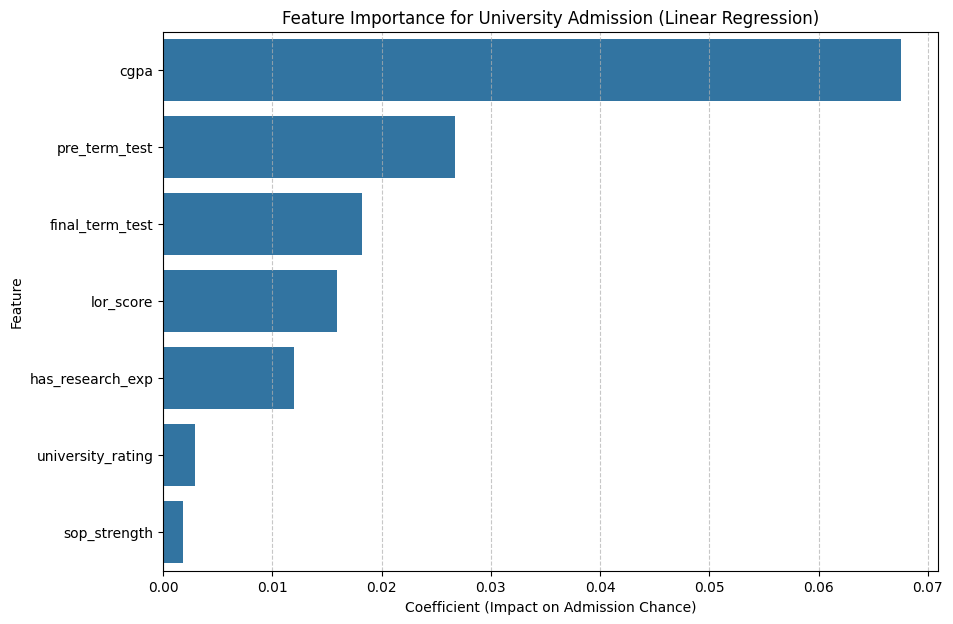

In [31]:
plt.figure(figsize=(10, 7))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for University Admission (Linear Regression)')
plt.xlabel('Coefficient (Impact on Admission Chance)')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()